In [1]:
import wandb
import pickle
import numpy as np
from MountainCarEnv import MountainCarEnv
from QLearning import QLearning

In [2]:
qLearningCar = QLearning("rgb_array")

In [3]:
all_iterations = []
all_alphas = []
all_epsilons = []
all_gammas = []

In [4]:
iterations = 10000
all_iterations.append(iterations)

alpha = 0.1 #learning_rate: variacion permitida
all_alphas.append(alpha)

epsilon = 1 #exploration_rate:  más grande mas exploracion
all_epsilons.append(epsilon)

gamma = 0.99  #discount_factor: futuro - ¿¿¿learning rate???? - mas bajo mas greedy
all_gammas.append(gamma)

In [5]:
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.001
min_eps_before_decay = 1000
initial_alpha = 0.9
final_alpha = 0.1

In [6]:
print(all_epsilons)
print(all_iterations)

[1]
[10000]


In [6]:
divPos = qLearningCar.env.observation_space.shape[0] #2
divVel = 10

In [7]:
# start a new wandb run to track this script
wandb.init(
    # Dejar solo un proyecto
    project="MountainCar",
    # track hyperparameters and run metadata
    config={
        "initial_alpha": alpha,
        "initial_epsilon": epsilon,
        "initial_gamma": gamma,
        "Discretizacion_Pos": divPos,
        "Discretizacion_Vel": divVel,
        "Min eps before decay epsilon": min_eps_before_decay,
        #"max_exploration_rate": max_exploration_rate,
        #"max_exploration_rate": min_exploration_rate,
        #"max_exploration_rate": exploration_decay_rate
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: irazoqui-santi (santiago-irazoqui). Use `wandb login --relogin` to force relogin


In [12]:
#qLearningCar.discretizar(divPos, divVel) #pasar variables de discretizacion desde ipynb

In [56]:
# qLearningCar.qLearning_2(iterations, 
#                     alpha, 
#                     gamma, 
#                     epsilon, 
#                     max_exploration_rate, 
#                     min_exploration_rate,
#                     exploration_decay_rate)
# Q = qLearningCar.Q

In [9]:
pickle_in = open("Pickles\Q_auto_-170-Pos_2_Vel_10.pkl","rb")
Old_Q = pickle.load(pickle_in)

In [14]:
#qLearningCar.setQ(Old_Q)

In [10]:
#Q, initial_state_Q_list, epsilon_decay_list = qLearningCar.qLearning_bajar_epsilon_1(iterations, alpha, epsilon, gamma)

In [15]:
Q, initial_state_Q_list, epsilon_decay_list = qLearningCar.qLearning_decay_learning_rate_2(iterations, initial_alpha, final_alpha, epsilon, gamma, min_eps_before_decay)

In [24]:
iterations_to_run = 10000
iterations_total = 0
best_score = -170.02
pickle_count = 0
meta_iteration_count = 1
while(iterations_total < 100000):
    Q, initial_state_Q_list, epsilon_decay_list = qLearningCar.qLearning_decay_learning_rate_2(
        iterations, initial_alpha, final_alpha, epsilon, gamma, min_eps_before_decay
    )
    test_value = qLearningCar.execute(100)
    
    if(test_value > best_score):
        best_score = test_value
        pickle_out = open('Q_auto_' + str(pickle_count) + "_" + str(test_value) +'.pkl', 'wb')
        pickle.dump(Q, pickle_out)
        pickle_out.close()
        pickle_count += 1
        best_Q = Q
        
        # data = [[x, y] for (x, y) in zip(range(0, iterations), initial_state_Q_list)]
        # table = wandb.Table(data=data, columns = ["x", "y"])
        # wandb.log({
        #     "Q_train_" + str(meta_iteration_count) : wandb.plot.line(table, "x", "y",
        #         title="#Q train " + str(meta_iteration_count))
        # })
    iterations_total += iterations_to_run
    print(iterations_total)
    print("V(Q) = " + str(test_value))

    meta_iteration_count += 1

10000
V(Q) = -431.47
20000
V(Q) = -198.24
30000
V(Q) = -448.41
40000
V(Q) = -195.0
50000
V(Q) = -500.0
60000
V(Q) = -266.16
70000
V(Q) = -266.36
80000
V(Q) = -167.82


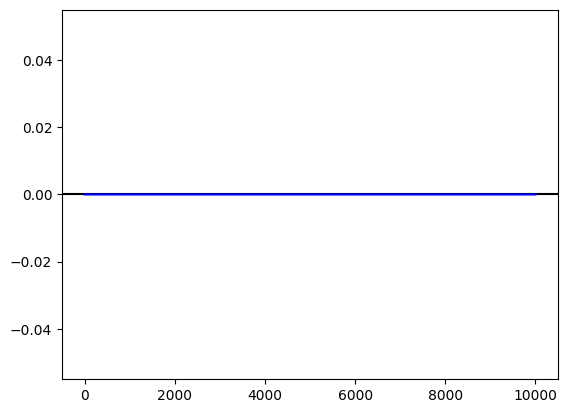

In [16]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, iterations), initial_state_Q_list, color='blue')

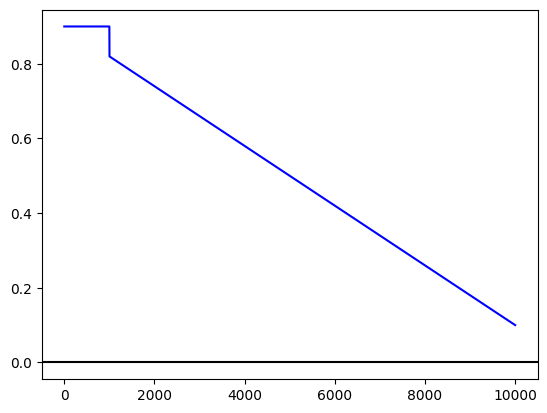

In [17]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, iterations), qLearningCar.alpha_decay_list, color='blue')

In [18]:
data = [[x, y] for (x, y) in zip(range(0, iterations), qLearningCar.alpha_decay_list)]
table = wandb.Table(data=data, columns = ["x", "y"])
wandb.log(
    {"Learning rate decay" : wandb.plot.line(table, "x", "y",
           title="Learning rate decay")})

In [21]:
#best_average = -500

In [22]:
average = qLearningCar.execute(100)
if(average > best_average):
    best_average = average
    best_Q = Q

In [23]:
best_average

-217.67

In [15]:
qLearningCar.rewards

[-224.7,
 -283.05,
 -238.35,
 -419.75,
 -500.0,
 -209.32,
 -452.78,
 -287.49,
 -443.44,
 -212.16]

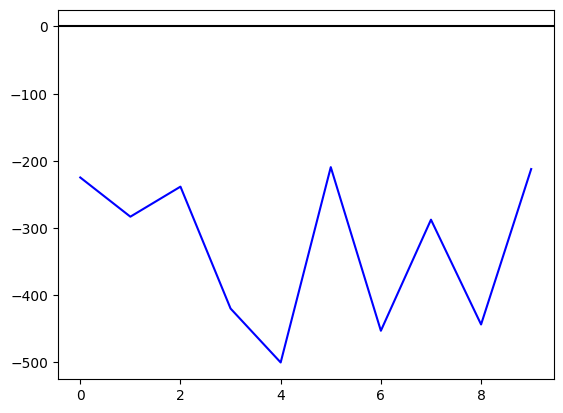

In [16]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, len(qLearningCar.rewards)), qLearningCar.rewards, color='blue')

In [17]:
data = [[x, y] for (x, y) in zip(range(0, len(qLearningCar.rewards)), qLearningCar.rewards)]
table = wandb.Table(data=data, columns = ["x", "y"])
wandb.log(
    {"Decay_alpha" : wandb.plot.line(table, "x", "y",
           title="Decay alpha")})

In [19]:
#tendria que subir la plot
wandb.log({"Decay alpha values": qLearningCar.rewards})

In [20]:
# log metrics to wandb --> these go on a separate table than the configuration in config.
wandb.log({
    "iterations": all_iterations, 
    "alphas": all_alphas, 
    "epsilons": all_epsilons, 
    "gammas": all_gammas, 
})

In [50]:
wandb.log({
    "Iterations third run": iterations_total 
})

In [21]:
#finished uploading
wandb.finish()